# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


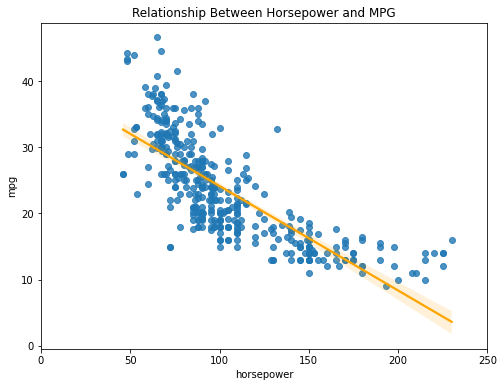

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
# call_on_students(1)

#### Answer: 

- This is a loss function and a cost function; error plotted against a parameter we're measuring it against.
- We have the lowest error (RSS) at a slope of around -1.58; increasing or decreasing the slope increases our error
- We use this function to perform gradient descent, which will find our minimum error and, in turn, our optimum slope

### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
# call_on_students(1)

#### Answer: 

- Step size: how far we move down our cost function
- Learning rate: fraction (proportion) of the gradient that we use to calculate the size of the next step
- Our step-size is determined by our learning rate and how far away from the minimum we are (or our gradient); step-size decreases as we get closer to the minimum

## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
# call_on_students(1)

#### Answer: 

- Target: Classification; binary or multiclass
- Predictions: Probability (converted log-odds)
- Target for linear regression is continuous, whereas the target for logistic regression is discrete/categorical
- Logistic regression is parametric (it has parameters); it optimizes for our coefficients

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
# call_on_students(1)

#### Answer: 
Pros:
- Quick to train (fit)
- Not prone to overfitting: built-in regularization
- Interpretable (transparent)

Cons:
- Don't handle class imbalance well
- Heavily impacted by outliers

(these are better accounted for by decision trees)

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
# call_on_students(1)

In [14]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop("target", axis=1)
y = mpg_class["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33, random_state=42)

In [15]:
# Scale the data
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [ ]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [18]:
# Code to explore
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

In [19]:
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- Strong class imbalance; we have about 75% 0s

#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Predict all values to be a 0
- DummyClassifier(strategy="most_frequent")


#### Part 3: How accurate would that baseline be on test data?


In [21]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- This model would be around 75% accurate


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:

- Target has class imbalance:
- SMOTE (oversample minority or undersample majority (only on large datasets))
- class_weight
- using predict_probs we can manually tinker with the threshold

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [22]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

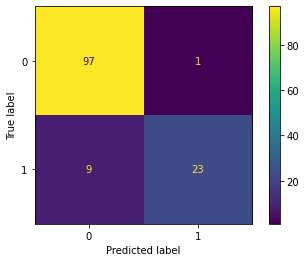

In [25]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [28]:
y_pred_test = logreg.predict(X_test_scaled)

In [26]:
# Accuracy - (TN+TP)/(Total)
(97+23)/(97+23+9+1)

0.9230769230769231

In [29]:
accuracy_score(y_test, y_pred_test)

0.9230769230769231

In [32]:
# Precision - (TP)/(TP+FP)
23/(23+1)

0.9583333333333334

In [31]:
precision_score(y_test, y_pred_test)

0.9583333333333334

In [34]:
# Recall (TP)/(TP+FN)
23/(23+9)

0.71875

In [33]:
recall_score(y_test, y_pred_test)

0.71875

In [ ]:
# F1-Score


In [35]:
f1_score(y_test, y_pred_test)

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [39]:
# Calculate roc-auc
test_probs = logreg.predict_proba(X_test_scaled)
pos_probs = test_probs[:,1]
roc_auc_score(y_test, pos_probs)

0.9811862244897959

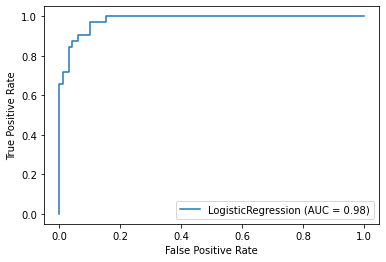

In [40]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

The model is doing quite well. The accuracy and precision are very strong; our recall, however, is somewhat lower.

If false negatives were a priority in our business situation (i.e. we were more concerned about identifying every positive case than avoiding false positives), we may want to adjust the model to be more sensitive.

## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [41]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

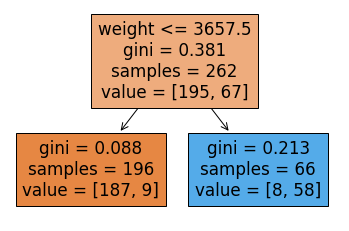

In [42]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

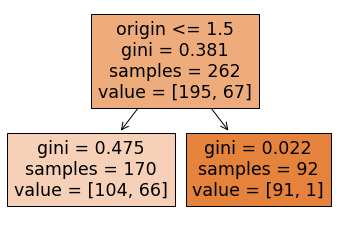

In [43]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Version 1: Weight
- We can tell by either adding the two gini scores on each side; the weight split's nodes have lower values than the origin split's nodes.
- We can also observe this by comparing the values, i.e. the breakdown of the two classes in each node


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [44]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

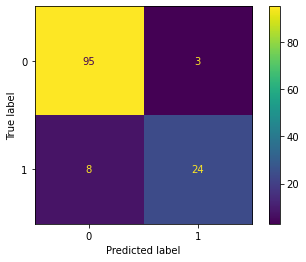

In [45]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test_scaled, y_test);

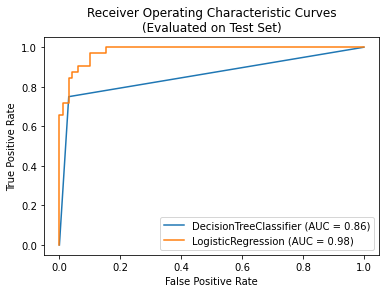

In [46]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

The logistic regression model has a stronger ROC-AUC score, as displayed in the plot. We can also visually assess that there is a greater area under the curve of the logistic curve.
